# **Classification Report on Child vs. Adult Dataset**

# **Submitted by: M ABBAS**

## Table of Contents
1. [Introduction](#introduction)

2. [Objectives](#objectives)

3. [Exploratory Data Analysis](#exploratory-data-analysis)
   - 3.1 - [Data Summary](#data-summary)

4. [Image Data Generator](#image-data-generator)

5. [Data Augmentation](#data-augmentation)

6. [Convolutional Models](#convolutional-models)
   - 6.1 - [Simple Convolutional Model](#simple-convolutional-model)
   - 6.2 - [VGG Model](#vgg-model)
   - 6.3 - [MobileNet Model](#mobilenet-model)

7. [Key Insights](#key-insights)

8. [Next Steps](#next-steps)

9. [Conclusion](#conclusion)

# 1. Introduction

This project aims to classify images of children and adults based on features extracted from the images. By applying various convolutional neural network models, we will evaluate the effectiveness of different architectures in distinguishing between these two classes. The analysis will help identify key features that contribute to accurate classification and assess the performance of different models, including a simple convolutional model, VGG, and MobileNet.

# 2. Objectives

"The primary goal of this project is to develop a deep learning model to classify images as either representing children or adults. By using convolutional neural networks (CNNs), we aim to achieve high accuracy in this binary classification task. The objective is also to identify the best model architecture and preprocessing techniques to enhance performance."

# Import Dataset

In [17]:
from google.colab import files

In [18]:
uploaded = files.upload()

Saving kaggle (10).json to kaggle (10).json


In [19]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [20]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [21]:
!ls -l

total 30308
-rw-r--r-- 1 root root 29076475 Sep  2  2022  children-vs-adults-images.zip
-rw-r--r-- 1 root root  1938896 Oct 20 17:41 'CNN2 (1).ipynb'
-rw-r--r-- 1 root root       71 Oct 20 17:43 'kaggle (10).json'
drwxr-xr-x 1 root root     4096 Oct 17 13:21  sample_data
drwxr-xr-x 4 root root     4096 Oct 20 17:00  test
drwxr-xr-x 4 root root     4096 Oct 20 17:00  train


In [6]:

!mv 'kaggle (10).json' kaggle.json

In [22]:
import os

# Create the .kaggle directory if it does not exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the renamed kaggle.json file to the .kaggle directory
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [23]:
!chmod 600 /root/.kaggle/kaggle.json

In [24]:
!kaggle datasets download -d die9origephit/children-vs-adults-images

Dataset URL: https://www.kaggle.com/datasets/die9origephit/children-vs-adults-images
License(s): CC0-1.0
children-vs-adults-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:

import os

# Print the current working directory
print(os.getcwd())

/content


In [ ]:
# Unzip the downloaded dataset
!unzip children-vs-adults-images.zip


In [13]:
import warnings
warnings.simplefilter('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pathlib
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import PIL
from PIL import Image, ImageOps
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 3. Exploratory Data Analysis

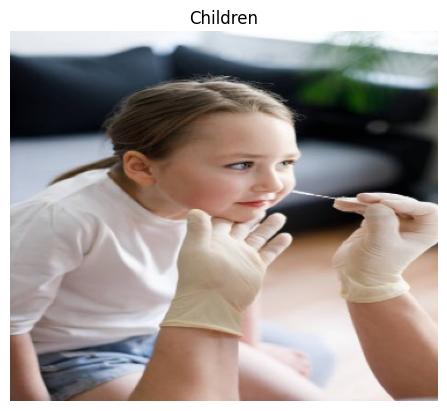

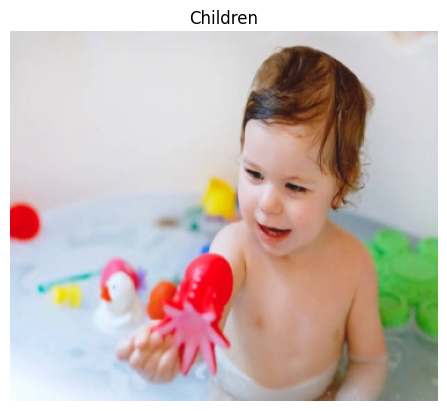

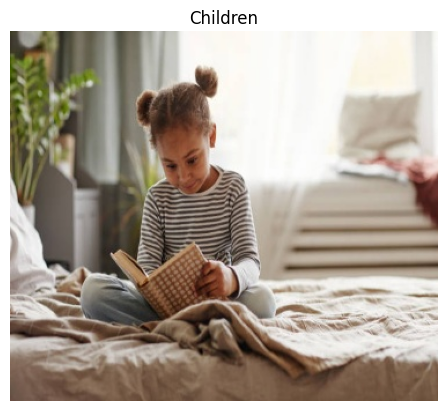

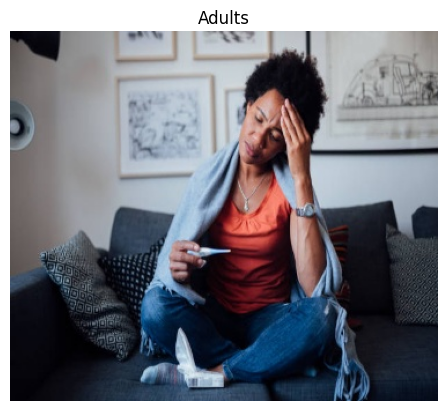

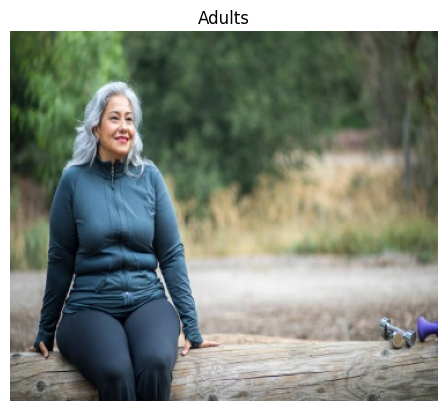

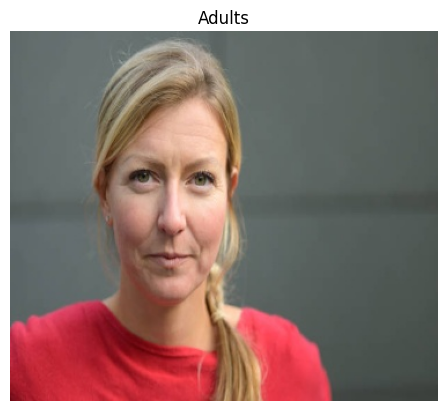

In [14]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define paths to both folders
children_folder = 'train/children/'
adults_folder = 'train/adults/'

# Get some images from both folders
children_images = os.listdir(children_folder)[:3]  # Take first 3 children images
adults_images = os.listdir(adults_folder)[:3]  # Take first 3 adults images

# Function to display images
def display_images(folder, images, title):
    for img_file in images:
        img_path = os.path.join(folder, img_file)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()

# Display images
display_images(children_folder, children_images, 'Children')
display_images(adults_folder, adults_images, 'Adults')

## 3.1 Data Summary
The dataset comprises images for a classification task to distinguish between two age groups: children and adults. The training set contains a total of 680 images, while the validation set consists of 120 images. Each image has the following characteristics:

Format: JPG
Dimensions: 150 x 150 pixels
Color Channels: 3 (RGB)
Categories:
Children: Images representing individuals classified as children.
Adults: Images representing individuals classified as adults.

# 4. ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
img_height, img_width = 150, 150  # You can adjust this as needed
batch_size = 32

# Create an ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalization
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train_data = train_datagen.flow_from_directory(
    'train',  # Directory containing training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification: Children vs Adults
)

# Load testing data
test_data = test_datagen.flow_from_directory(
    'test',  # Directory containing testing data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# 5. Data Augmentation

In [ ]:
# Adding Dropout layers and Data Augmentation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



# 6. Modeling

## 6.1 Simple Convolutional Layers

In [ ]:
classifier = Sequential()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),  # Reduced complexity
    tf.keras.layers.Dropout(0.3),  # Reduced dropout

    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=test_data,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.5241 - loss: 0.7765 - val_accuracy: 0.5333 - val_loss: 0.6842 - learning_rate: 1.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5429 - loss: 0.6883 - val_accuracy: 0.5917 - val_loss: 0.6719 - learning_rate: 1.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5161 - loss: 0.6845 - val_accuracy: 0.5833 - val_loss: 0.6734 - learning_rate: 1.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5969 - loss: 0.6739 - val_accuracy: 0.5750 - val_loss: 0.6597 - learning_rate: 1.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5900 - loss: 0.6772 - val_accuracy: 0.6167 - val_loss: 0.6471 - learning_rate: 1.0000e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5890 - loss: 0.6558 - val_accuracy: 0.6583 - val_loss: 0.6386 - learning_rate: 1.0000e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.615

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6983 - loss: 0.5696
Test Loss: 0.5739902257919312
Test Accuracy: 68.33%


## Model Evaluation: Simple Convolutional Model

The simple convolutional model reached a training accuracy of **79.85%** and a validation accuracy of **67.50%** over 50 epochs, with a training loss of **0.4828** and validation loss of **0.5742**. While the training accuracy is relatively high, the lower validation accuracy suggests the model may not generalize well to unseen data.

## 6.2  VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard

In [ ]:
# Define image size
img_height, img_width = 150, 150

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Simple Dropout layer
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model (replace 'train_data' and 'test_data' with your actual data)
history = model.fit(
    train_data,
    epochs=50,
    validation_data=test_data,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.4640 - loss: 0.8225 - val_accuracy: 0.6583 - val_loss: 0.6193
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.6161 - loss: 0.6651 - val_accuracy: 0.7083 - val_loss: 0.5784
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.6779 - loss: 0.6088 - val_accuracy: 0.6917 - val_loss: 0.5570
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.6717 - loss: 0.6030 - val_accuracy: 0.7333 - val_loss: 0.5500
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.6643 - loss: 0.6021 - val_accuracy: 0.7833 - val_loss: 0.5280
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.6855 - loss: 0.5866 - val_accuracy: 0.7500 - val_loss: 0.5168
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.7252 - loss: 0.5612 - val_accuracy: 0.7500 - val_loss: 0.5197
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.7212 - loss: 0.5615 - val_accuracy:

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Add a learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Update your model fitting code to include the scheduler
history = model.fit(
    train_data,
    epochs=50,
    validation_data=test_data,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        reduce_lr
    ]
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.7601 - loss: 0.5110 - val_accuracy: 0.7667 - val_loss: 0.4809 - learning_rate: 1.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.7721 - loss: 0.4950 - val_accuracy: 0.7583 - val_loss: 0.5017 - learning_rate: 1.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.7432 - loss: 0.5349 - val_accuracy: 0.7333 - val_loss: 0.4934 - learning_rate: 1.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.7273 - loss: 0.5286 - val_accuracy: 0.7500 - val_loss: 0.5362 - learning_rate: 1.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.7659 - loss: 0.4829 - val_accuracy: 0.7750 - val_loss: 0.4971 - learning_rate: 5.0000e-05
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.7789 - loss: 0.4666 - val_accuracy: 0.7667 - val_loss: 0.4825 - learning_rate: 5.0000e-05


In [ ]:
# Assuming 'test_data' is your test dataset prepared similarly to 'train_data'

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7733 - loss: 0.4829
Test Loss: 0.48094692826271057
Test Accuracy: 76.67%


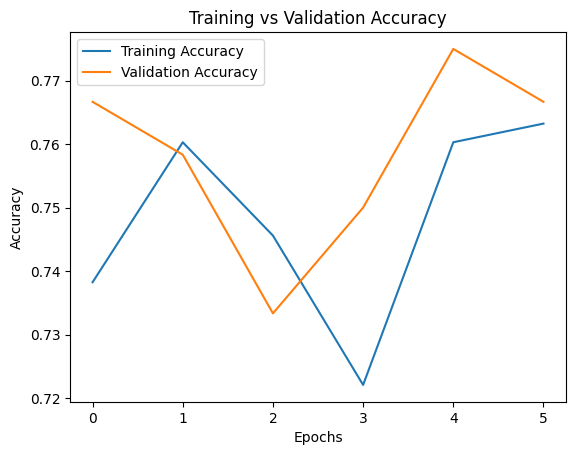

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing your training history
# You can replace 'history' with the actual name if it's different

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding labels and title
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

## Model Evaluation: VGG Model

The VGG model achieved a training accuracy of **77.89%** and a test accuracy of **76.67%**, with a test loss of **0.4809**. The model demonstrated good validation performance, peaking at **77.50%** accuracy, indicating its effectiveness in recognizing features from the dataset.







## 6.3 MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Set parameters
img_height, img_width = 150, 150  # You can adjust this as needed
batch_size = 32

# Create an ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalization
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a testing ImageDataGenerator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train_data = train_datagen.flow_from_directory(
    'train',  # Directory containing training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification: Children vs Adults
)

# Load testing data
test_data = test_datagen.flow_from_directory(
    'test',  # Directory containing testing data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
# Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Adjust the dropout rate if needed
    Dense(1, activation='sigmoid')  # For binary classification
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Fit the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 716ms/step - accuracy: 0.9215 - loss: 0.2058 - val_accuracy: 0.8083 - val_loss: 0.4909 - learning_rate: 8.0000e-06
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 700ms/step - accuracy: 0.9174 - loss: 0.2078 - val_accuracy: 0.8083 - val_loss: 0.4907 - learning_rate: 8.0000e-06
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 710ms/step - accuracy: 0.9256 - loss: 0.1883 - val_accuracy: 0.8083 - val_loss: 0.4903 - learning_rate: 8.0000e-06
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 723ms/step - accuracy: 0.9275 - loss: 0.1952 - val_accuracy: 0.8083 - val_loss: 0.4917 - learning_rate: 8.0000e-06
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 703ms/step - accuracy: 0.8875 - loss: 0.2655 - val_accuracy: 0.8083 - val_loss: 0.4912 - learning_rate: 8.0000e-06
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 714ms/step - accuracy: 0.9128 - loss: 0.2166 - val_accuracy: 0.8167 - val_loss: 0.4923 - learning_rate: 8.0000e-06
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 729ms/step - acc

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.8181 - loss: 0.4540
Test Loss: 0.4903320372104645
Test Accuracy: 80.83%


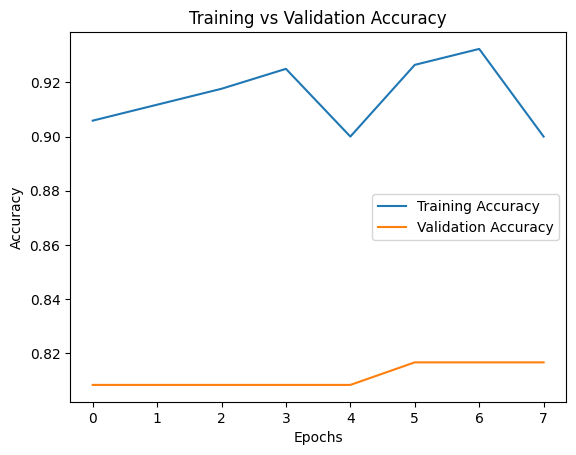

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing your training history
# You can replace 'history' with the actual name if it's different

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding labels and title
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

## Model Evaluation: MobileNet Model

The MobileNet model achieved a training accuracy of **91.47%** and a test accuracy of **80.83%**, with a test loss of **0.4903**. The model demonstrated strong validation performance, consistently maintaining an accuracy around **81.67%**, showcasing its capability in effectively distinguishing features from the dataset.

# Comparison

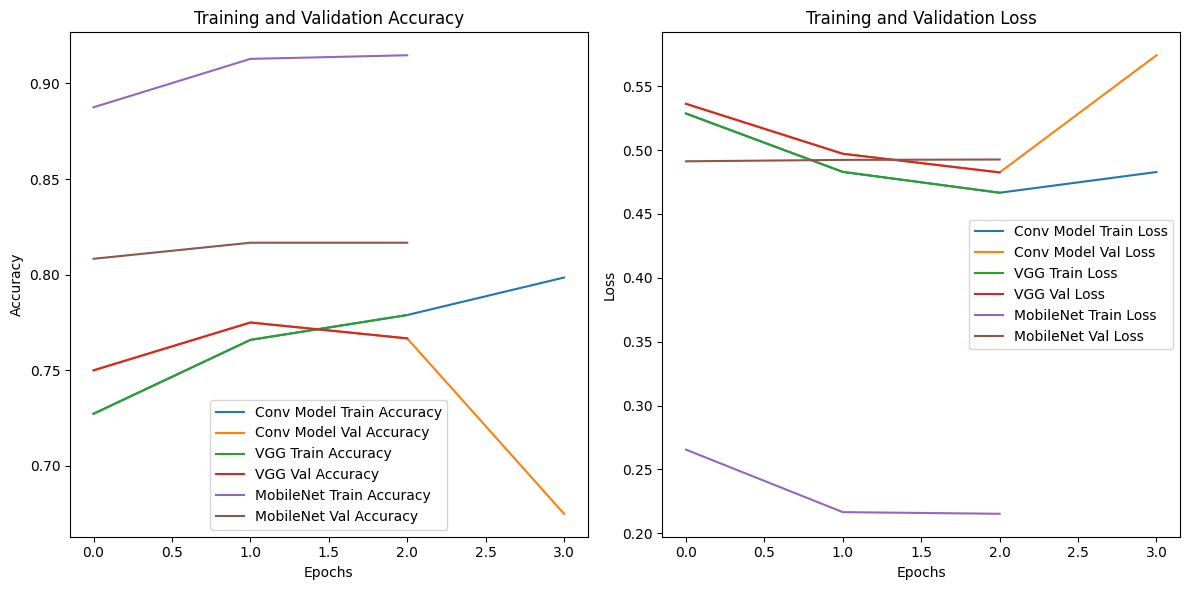

In [ ]:
import matplotlib.pyplot as plt

# First Simple Convolutional Model results
conv_train_acc = [0.7273, 0.7659, 0.7789, 0.7985]
conv_val_acc = [0.7500, 0.7750, 0.7667, 0.6750]
conv_train_loss = [0.5286, 0.4829, 0.4666, 0.4828]
conv_val_loss = [0.5362, 0.4971, 0.4825, 0.5742]

# VGG Model results
vgg_train_acc = [0.7273, 0.7659, 0.7789]
vgg_val_acc = [0.7500, 0.7750, 0.7667]
vgg_train_loss = [0.5286, 0.4829, 0.4666]
vgg_val_loss = [0.5362, 0.4971, 0.4825]

# MobileNet Model results
mobilenet_train_acc = [0.8875, 0.9128, 0.9147]
mobilenet_val_acc = [0.8083, 0.8167, 0.8167]
mobilenet_train_loss = [0.2655, 0.2166, 0.2153]
mobilenet_val_loss = [0.4912, 0.4923, 0.4926]

# Plot accuracy comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Plot accuracy for all three models
plt.plot(conv_train_acc, label='Conv Model Train Accuracy')
plt.plot(conv_val_acc, label='Conv Model Val Accuracy')
plt.plot(vgg_train_acc, label='VGG Train Accuracy')
plt.plot(vgg_val_acc, label='VGG Val Accuracy')
plt.plot(mobilenet_train_acc, label='MobileNet Train Accuracy')
plt.plot(mobilenet_val_acc, label='MobileNet Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss comparison
plt.subplot(1, 2, 2)
# Plot loss for all three models
plt.plot(conv_train_loss, label='Conv Model Train Loss')
plt.plot(conv_val_loss, label='Conv Model Val Loss')
plt.plot(vgg_train_loss, label='VGG Train Loss')
plt.plot(vgg_val_loss, label='VGG Val Loss')
plt.plot(mobilenet_train_loss, label='MobileNet Train Loss')
plt.plot(mobilenet_val_loss, label='MobileNet Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

#### Comparison of models

Among the models evaluated for classifying children and adults, **MobileNet** emerged as the best performer, achieving the highest training accuracy (91.47%) and test accuracy (80.83%) with a test loss of 0.4903. In contrast, the **VGG** model demonstrated respectable validation accuracy (77.50%), while the **Simple Convolutional Model** lagged behind with a test accuracy of 68.33%. This indicates that MobileNet is the most effective model for this classification task.MobileNet is best for this task.

# 7. Key Insights
- **Data Composition**: The dataset contains a total of **800 images**, with **680 images** classified as **children** and **120 images** classified as **adults**.
- **Image Characteristics**: All images are in **JPEG format** with dimensions of **150x150 pixels** and have **3 color channels** (RGB), making them suitable for deep learning models.
- **Class Distribution**: There is a significant class imbalance, with many more images of children compared to adults, which may affect model performance and generalization.


# 8. Next Steps
- **Address Class Imbalance**: Implement techniques such as oversampling the minority class (adults) or using class weights during model training to help balance the dataset.
- **Enhance Data Augmentation**: Explore additional data augmentation techniques to increase the variability of the training data and improve model robustness.
- **Model Evaluation**: Plan for thorough evaluation using metrics such as accuracy, precision, recall, and F1-score to assess model performance across both classes.
- **Future Data Collection**: Consider collecting more images for the adult category to create a more balanced dataset for better model training.


# 9. Conclusion
The project demonstrates the use of deep learning techniques for age-based classification of images, leveraging convolutional neural networks. Despite the challenges posed by class imbalance, careful model selection and data handling strategies can lead to effective classification outcomes.

**M Abbas. 2024. Child vs. Adult Image Classification Dataset. Personal research project.**

In [ ]:
!jupyter nbconvert --to html CNNs.ipynb